In [1]:
import requests
import json
#import logging
#import http.client
import pandas as pd
import xlwings as xw
from time import sleep
from datetime import datetime,time,timedelta
import os
#import property as p
import numpy as np
import matplotlib.pyplot as plt
#from scipy.interpolate import make_interp_spline, BSplin



pd.set_option("display.width",1500)
pd.set_option("display.max_columns",75)
pd.set_option("display.max_rows",150)


In [2]:
def readJson(filename):
    with open(filename,"r") as files:
        data = json.load(files)
    #print(data)
    return data


      Time  askPrice  askQty  bidQty  bidprice  change  changeinOpenInterest   expiryDate                           identifier  impliedVolatility  lastPrice  openInterest    pChange  pchangeinOpenInterest  strikePrice  totalBuyQuantity  totalSellQuantity  totalTradedVolume type underlying  underlyingValue
0    14:42   6108.85      50      25   5938.70     0.0                     0  01-Apr-2021  OPTIDXBANKNIFTY01-04-2021CE27300.00               0.00       0.00             0   0.000000               0.000000        27300              2975               2950                  0   CE  BANKNIFTY         33315.65
1    14:42   6417.30    2400    3675   5317.40     0.0                     0  01-Apr-2021  OPTIDXBANKNIFTY01-04-2021CE27400.00               0.00       0.00             0   0.000000               0.000000        27400              4175               4175                  0   CE  BANKNIFTY         33315.65
2    14:42   5941.00      25      25   5739.90     0.0                     0  0

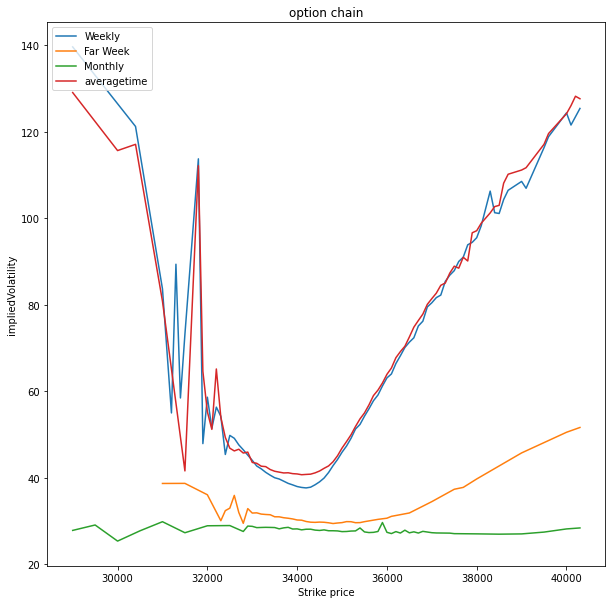

In [3]:
df_list = readJson("oi_data_records_310321.json")
df = pd.DataFrame()
for item in df_list:
    df = pd.concat([df,pd.DataFrame(item)])
print(df)
df1 = df[df['expiryDate'] == '01-Apr-2021']
df2 = df[df['expiryDate'] == '08-Apr-2021']
df3 = df[df['expiryDate'] == '29-Apr-2021']
df1 = df1[(df1['lastPrice']  !=0) & (df1['type']=="CE")  & (df1['impliedVolatility']  !=0) & (df1['Time']== df1['Time'].max())]
df2 = df2[(df2['lastPrice']  !=0) & (df2['type']=="CE")  & (df2['impliedVolatility']  !=0) & (df2['Time']== df2['Time'].max())]
df3 = df3[(df3['lastPrice']  !=0) & (df3['type']=="CE")& (df3['impliedVolatility']  !=0)& (df3['Time']== df3['Time'].max())]
df5 = df[df['expiryDate'] == '01-Apr-2021']
df5 = df5[(df5['lastPrice']  !=0) & (df5['type']=="CE")  & (df5['impliedVolatility']  !=0) & (df5['Time']== "14:42")]
#print(df1[['strikePrice','lastPrice','type','impliedVolatility','Time']])
#print(df2)
#X_Y_Spline = make_interp_spline(df1['strikePrice'], df1['impliedVolatility'])
#X_ = np.linspace(df1['strikePrice'].min(), df1['strikePrice'].max(), 50)
#Y_ = X_Y_Spline(X_)
plt.figure(figsize=(10,10))
plt.plot(df1['strikePrice'],df1['impliedVolatility'] ,label ="Weekly")
plt.plot(df2['strikePrice'],df2['impliedVolatility'] ,label ="Far Week")
#plt.plot(X_,Y_ ,label ="Weekly")
plt.plot(df3['strikePrice'],df3['impliedVolatility'] ,label ="Monthly")
plt.plot(df5['strikePrice'],df5['impliedVolatility'] ,label ="averagetime")

plt.xlabel("Strike price")
plt.ylabel("impliedVolatility")
plt.title("option chain")
plt.legend(loc="upper left")

In [4]:

strikelist = [34000,34500, 35000,35500,36000]
df4 = df[df['expiryDate'] == '01-Apr-2021']

df4 = df4[(df4['lastPrice']  !=0) & (df4['strikePrice'].isin (strikelist))  & (df4['impliedVolatility']  !=0) & (df4['Time']== df4['Time'].max())]
print(df4)


      Time  askPrice  askQty  bidQty  bidprice  change  changeinOpenInterest   expiryDate                           identifier  impliedVolatility  lastPrice  openInterest    pChange  pchangeinOpenInterest  strikePrice  totalBuyQuantity  totalSellQuantity  totalTradedVolume type underlying  underlyingValue
67   15:30     61.70     100     175     61.30 -263.95                 12285  01-Apr-2021  OPTIDXBANKNIFTY01-04-2021CE34000.00              37.98      61.70         55912 -81.053278              28.159167        34000            163900             217900            1235936   CE  BANKNIFTY          33320.8
72   15:30     12.95     100    3225     12.85 -120.80                  6618  01-Apr-2021  OPTIDXBANKNIFTY01-04-2021CE34500.00              39.07      12.95         28144 -90.317757              30.744216        34500            121575             112575             574881   CE  BANKNIFTY          33320.8
77   15:30      6.70     200     675      6.60  -36.75                 -3170  0

In [5]:
print(df1.iloc[df1['openInterest'].argsort()[-3:]][['strikePrice','lastPrice','type','impliedVolatility','Time','openInterest']])
#print(df3.iloc[df3['openInterest'].argsort()[-3:]][['strikePrice','lastPrice','type','impliedVolatility','Time','openInterest']])

    strikePrice  lastPrice type  impliedVolatility   Time  openInterest
87        36000       4.85   CE              63.09  15:30         39451
62        33500     223.80   CE              40.01  15:30         43681
67        34000      61.70   CE              37.98  15:30         55912


In [6]:
group= df.groupby(['expiryDate','type','strikePrice']).agg({'openInterest':sum }) 

#print(group.iloc[group['openInterest'].argsort()[-3:]][['openInterest']])
group

openInterest
expiryDate  type strikePrice              
01-Apr-2021 CE   27300                   0
                 27400                   0
                 27500                   0
                 27600                   0
                 27700                   0
...                                    ...
29-Apr-2021 PE   39900                   0
                 40000               12004
                 40100                   0
                 40200                   0
                 40300                  16

[730 rows x 1 columns]

In [7]:
df.expiryDate

0      01-Apr-2021
1      01-Apr-2021
2      01-Apr-2021
3      01-Apr-2021
4      01-Apr-2021
          ...     
255    29-Apr-2021
256    29-Apr-2021
257    29-Apr-2021
258    29-Apr-2021
259    29-Apr-2021
Name: expiryDate, Length: 11680, dtype: object